In [1]:
"""
Generate reports for comparison.
"""
import os
import os.path as op

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib
from nipype.algorithms import confounds as nac
from nilearn import plotting

In [14]:
color_dict = {'accepted': 'green',
              'midk': 'yellow',
              'rejected': 'red',
              'ignored': 'gray'}


def plot_spectra(ct_df):
    fig, ax = plt.subplots(figsize=(10, 10))

    for clf in ct_df['classification'].unique():
        red_df = ct_df.loc[ct_df['classification'] == clf]
        if red_df.shape[0] > 0:
            kappas = red_df['kappa']
            rhos = red_df['rho']
            varex = red_df['normalized variance explained']
            ax.scatter(x=kappas, y=rhos, color=color_dict.get(clf, 'gray'), alpha=0.5,
                       edgecolors='black', label=clf, s=(varex*50)+25)

    ax.set_xlabel('Kappa')
    ax.set_ylabel('Rho')
    legend = ax.legend(frameon=True)
    for legend_handle in legend.legendHandles:
        legend_handle.set_sizes([50])
    
    return fig, ax


def plot_image(img, vmin=None, vmax=None):
    if isinstance(img, str):
        img = nib.load(img)
    
    dat = img.get_data()
    if vmin:
        dat[dat < vmin] = np.max((vmin, 0))
        vmin = np.min(dat)
    if not vmax:
        vmax = np.max(dat)
    
    coords = np.arange(-10, 62, 2, int)
    n_cols = 8
    n_rows = int(len(coords) / n_cols)
    start = 0
    end = n_cols

    fig, axes = plt.subplots(nrows=n_rows, figsize=(2*n_cols, 4*n_rows))
    for row in range(n_rows):
        row_coords = coords[start:end]
        plotting.plot_stat_map(
            stat_map_img=img, bg_img=None, display_mode='z',
            cut_coords=row_coords, axes=axes[row],
            annotate=False, vmax=vmax)
        start += n_cols
        end += n_cols
    return fig, axes


def plot_anatomical(img):
    if isinstance(img, str):
        img = nib.load(img)
    
    coords = np.arange(-10, 62, 2, int)
    n_cols = 8
    n_rows = int(len(coords) / n_cols)
    start = 0
    end = n_cols

    fig, axes = plt.subplots(nrows=n_rows, figsize=(2*n_cols, 4*n_rows))
    for row in range(n_rows):
        row_coords = coords[start:end]
        plotting.plot_anat(
            img, display_mode='z',
            cut_coords=row_coords, axes=axes[row],
            annotate=False)
        start += n_cols
        end += n_cols
    return fig, axes

In [3]:
tedana_dir = '/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/TED.p06.mlepca/'
#tedana_dir = '/Users/tsalo/data/TED/'

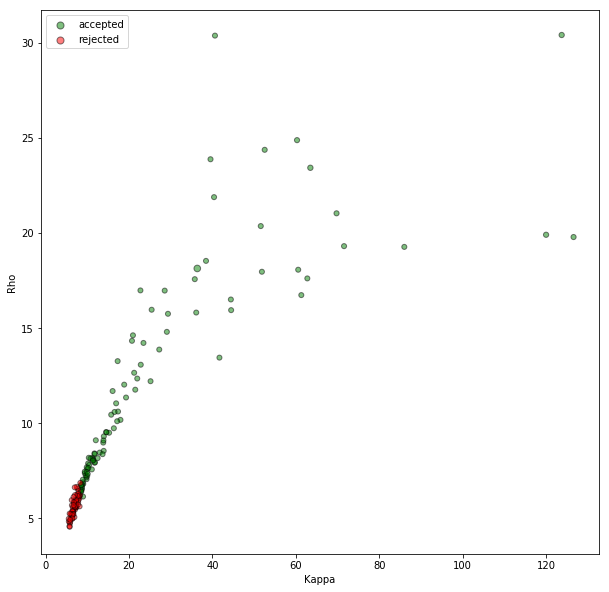

In [4]:
comptable_file = op.join(tedana_dir, 'comp_table_pca.txt')
comptable = pd.read_csv(comptable_file, sep='\t')

fig, ax = plot_spectra(comptable)

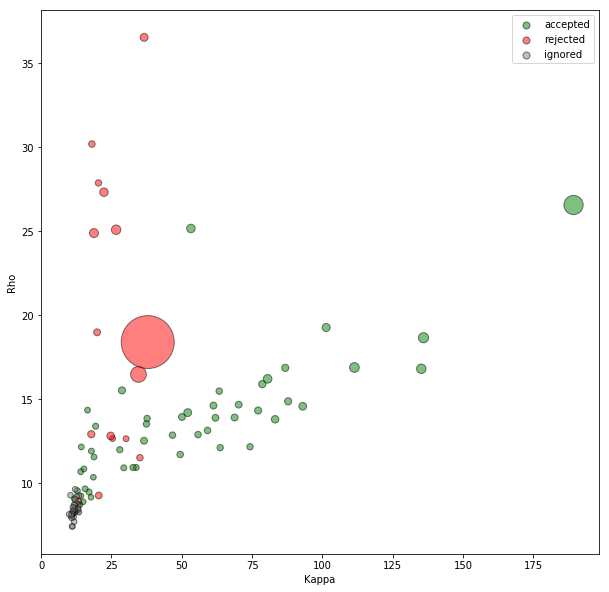

In [5]:
comptable_file = op.join(tedana_dir, 'comp_table_ica.txt')
comptable = pd.read_csv(comptable_file, sep='\t')

fig, ax = plot_spectra(comptable)

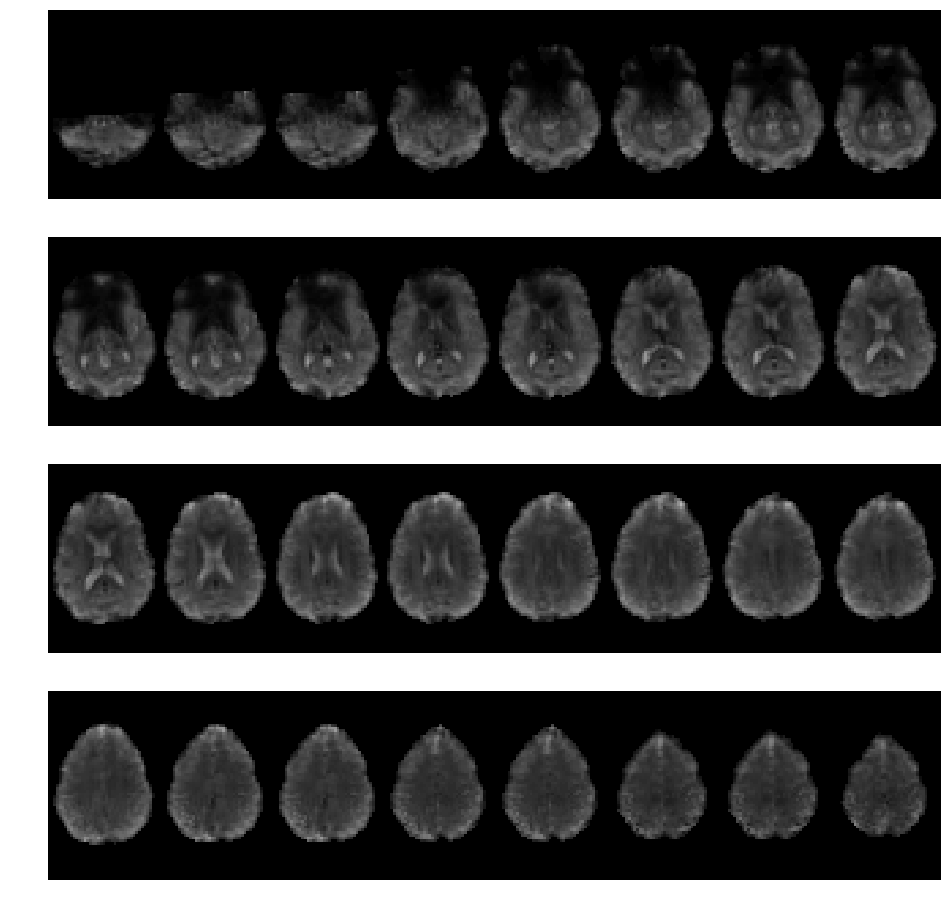

In [29]:
from glob import glob
from nilearn import image

files = sorted(glob('/Users/tsalo/Documents/tsalo/tedana_comparison/e5_data/p06.SBJ01_S09_Task11_e*.nii.gz'))
imgs = [nib.load(f) for f in files]
data = np.stack([img.get_data() for img in imgs], axis=-1)
data = np.mean(np.mean(data, axis=-1), axis=-1)

img = image.mean_img(files[4])
img2 = nib.Nifti1Image(data, imgs[0].affine)

fig, ax = plot_anatomical(img)

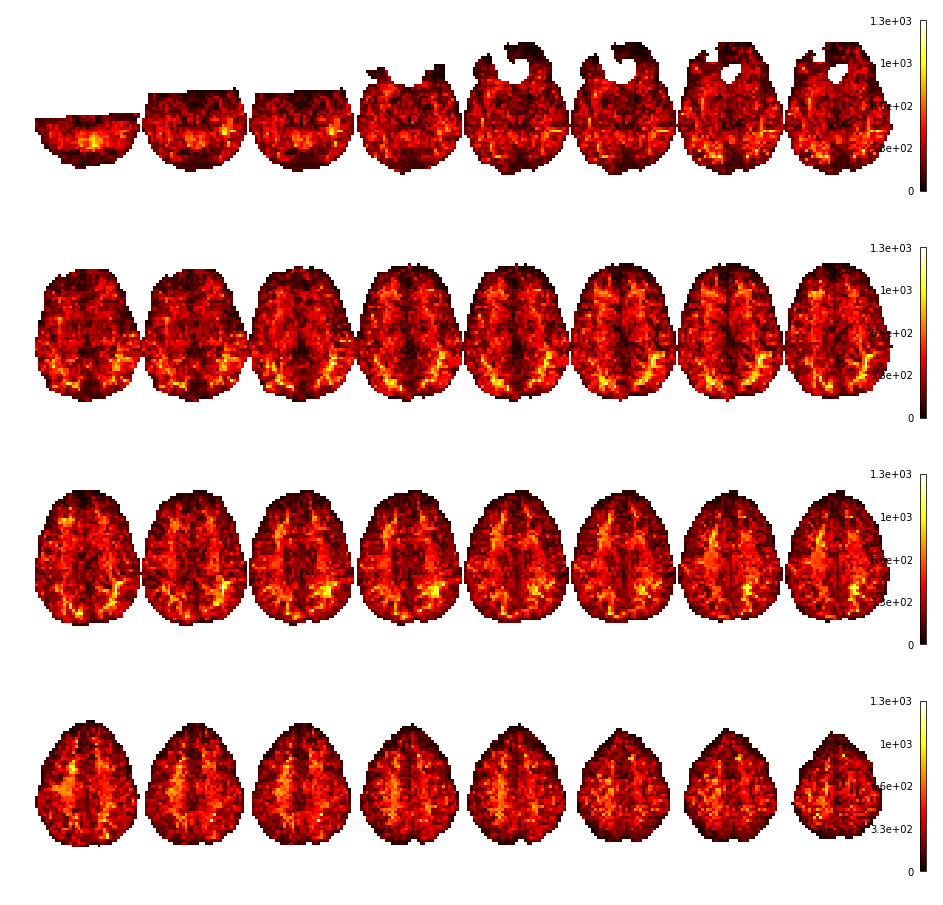

In [6]:
tsnr = nac.TSNR()
tsnr.inputs.in_file = op.join(tedana_dir, 'ts_OC.nii')
res = tsnr.run()

fig, ax = plot_image(res.outputs.tsnr_file)

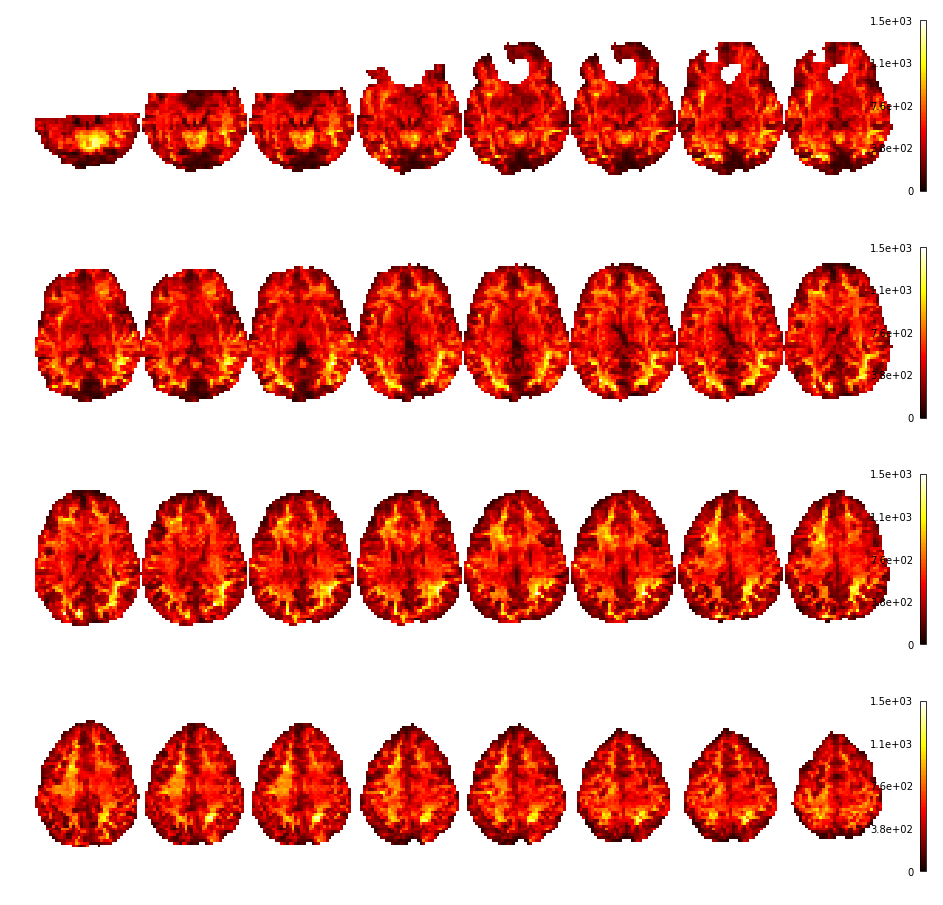

In [7]:
tsnr = nac.TSNR()
tsnr.inputs.in_file = op.join(tedana_dir, 'dn_ts_OC.nii')
res = tsnr.run()

fig, ax = plot_image(res.outputs.tsnr_file)

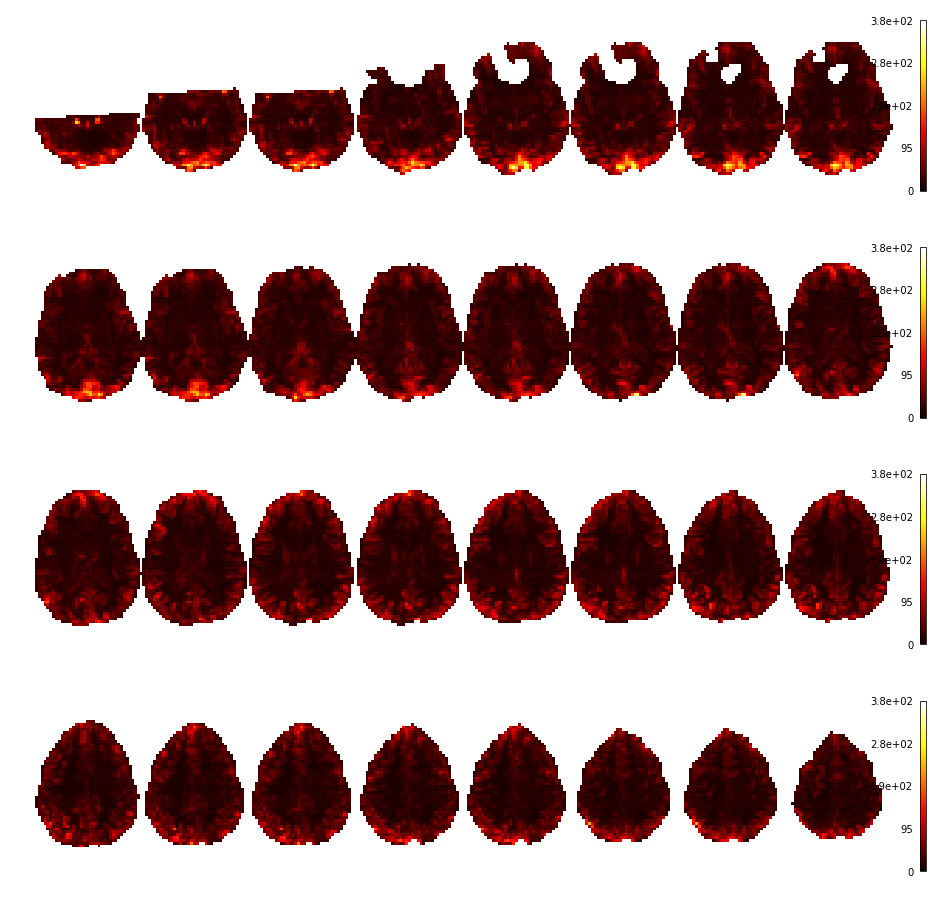

In [17]:
img = nib.load(op.join(tedana_dir, 'dn_ts_OC.nii'))
data = img.get_data()
data = np.std(data, axis=-1)
img2 = nib.Nifti1Image(data, img.affine)

fig, ax = plot_image(img2)

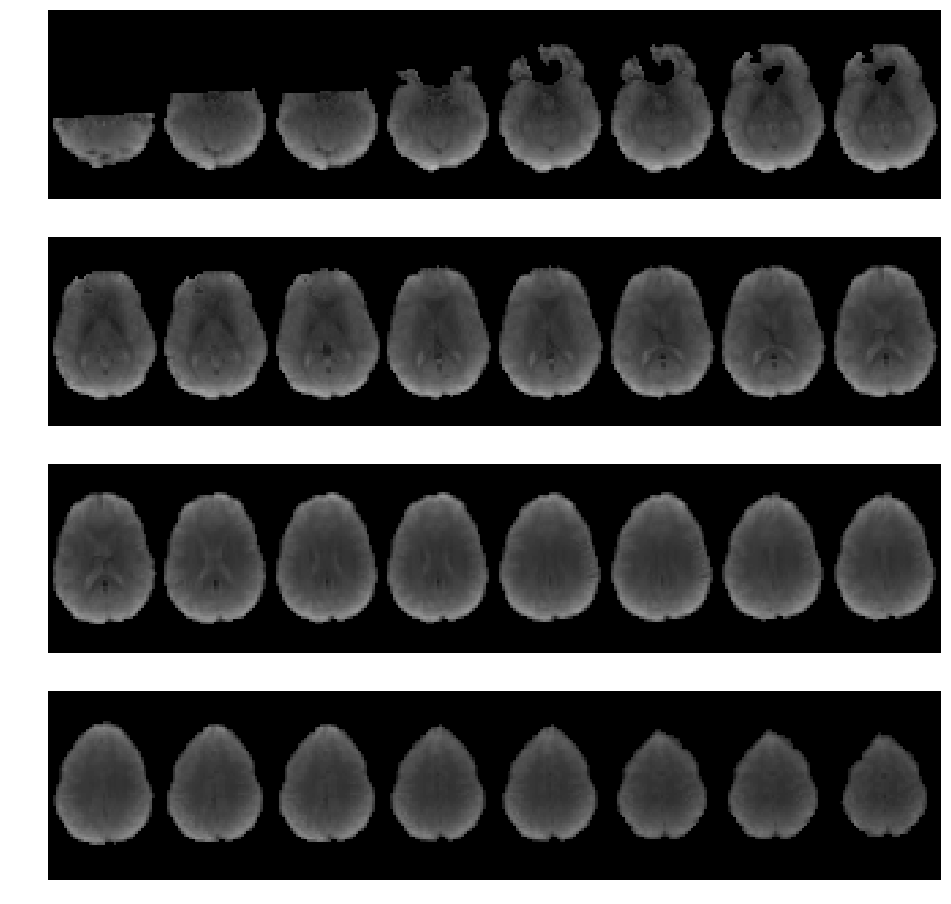

In [15]:
img = nib.load(op.join(tedana_dir, 'dn_ts_OC.nii'))
data = img.get_data()
data = np.mean(data, axis=-1)
img2 = nib.Nifti1Image(data, img.affine)

fig, ax = plot_anatomical(img2)

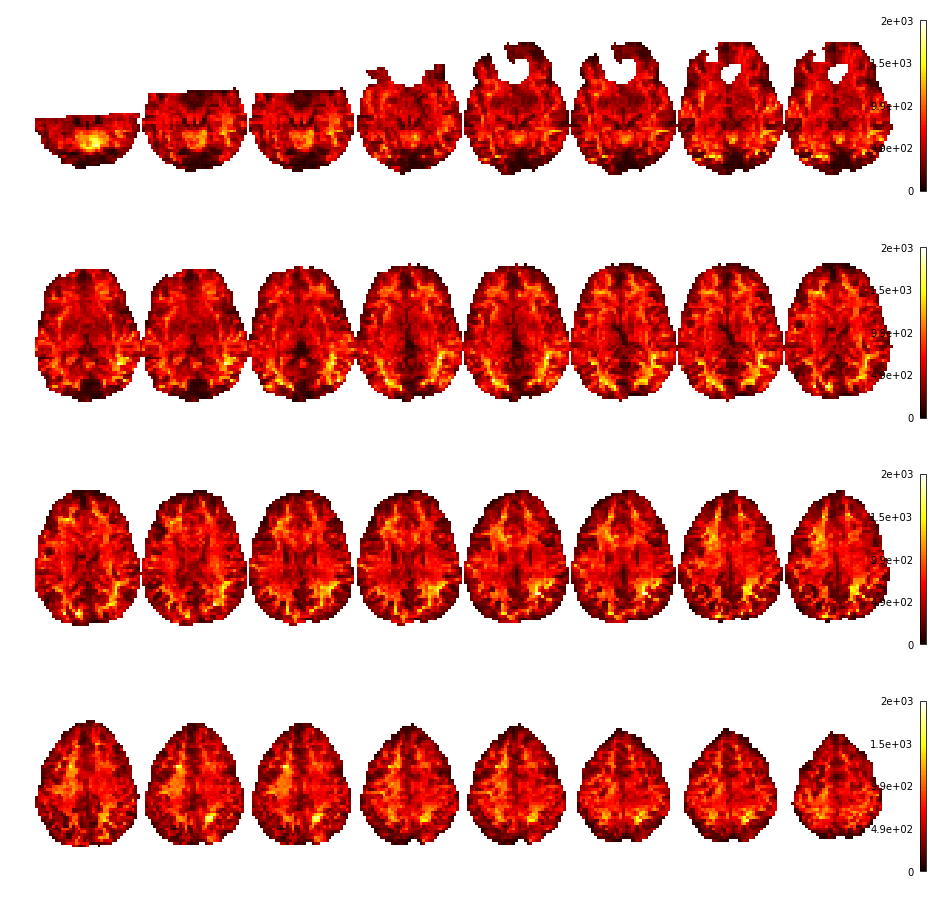

In [8]:
tsnr = nac.TSNR()
tsnr.inputs.in_file = op.join(tedana_dir, 'dn_ts_OC_T1c.nii')
res = tsnr.run()

fig, ax = plot_image(res.outputs.tsnr_file)

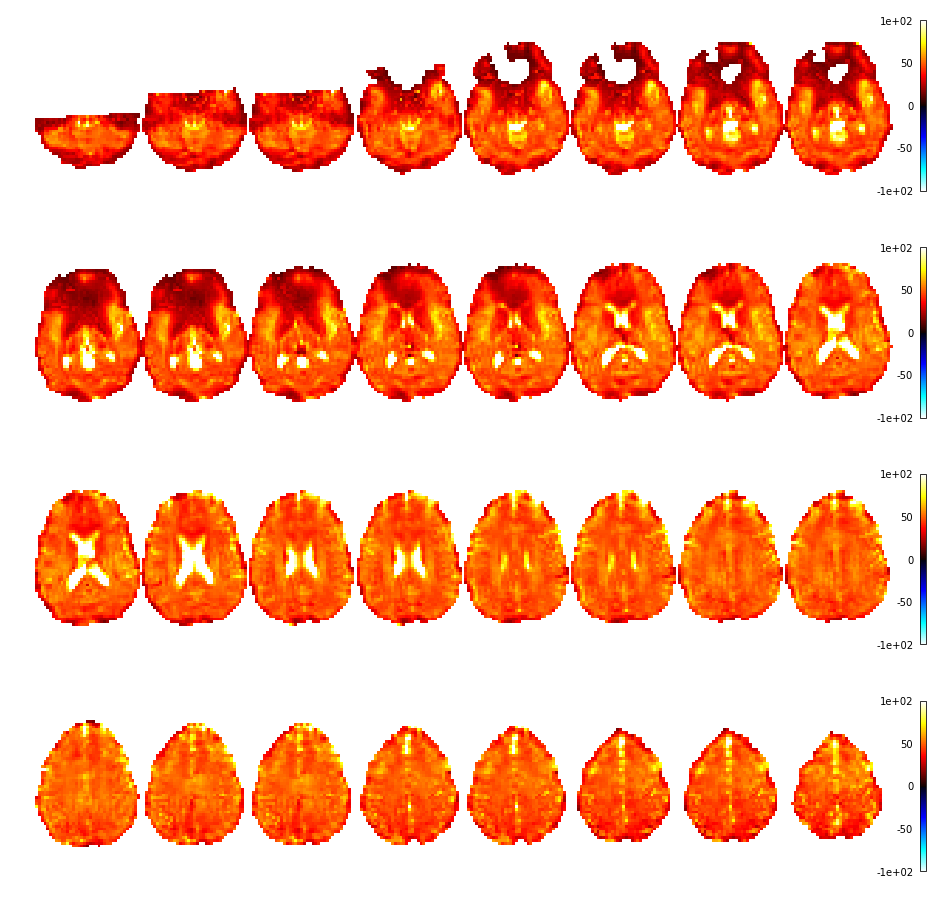

In [9]:
fig, ax = plot_image(op.join(tedana_dir, 't2sv.nii'), vmin=0, vmax=100)

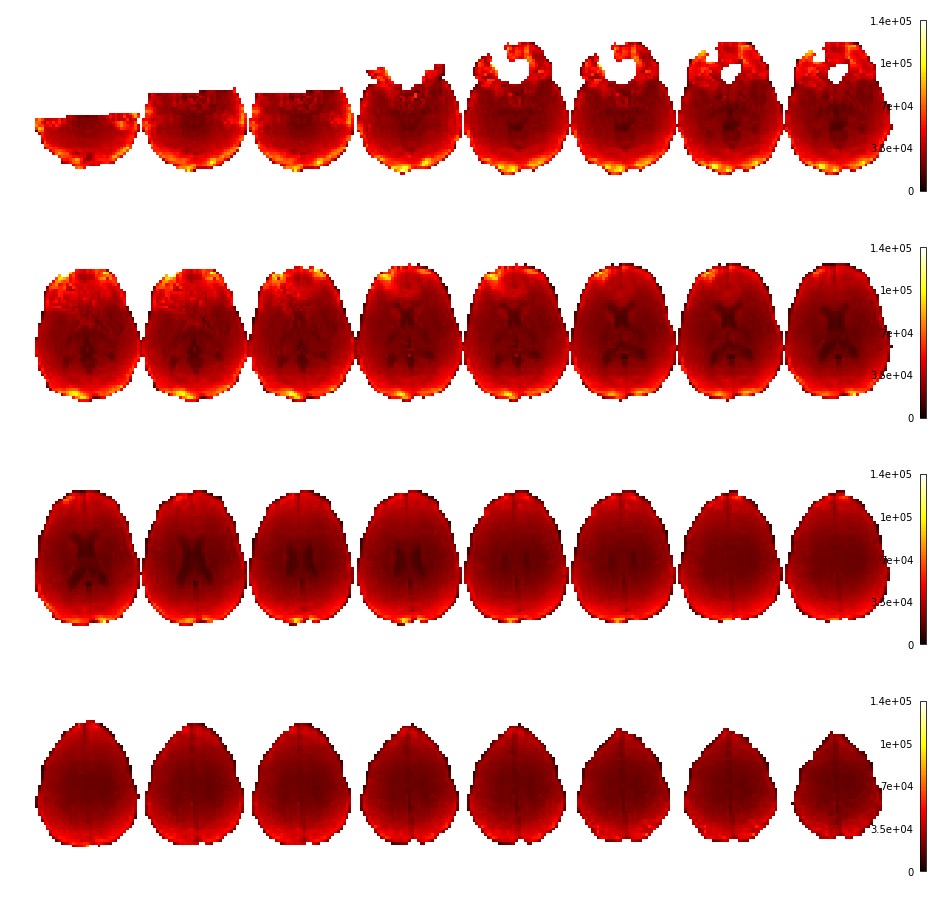

In [10]:
fig, ax = plot_image(op.join(tedana_dir, 's0v.nii'))